In [1]:
require 'Utils'
require 'Net1'
require 'VGG'

In [2]:
file_list = get_file_names();

In [3]:
print(#file_list)

10000	


In [4]:
im_batch = get_image_batch(5)

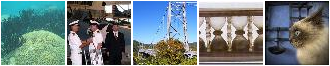

In [5]:
itorch.image(im_batch)


In [6]:
uv_images,y_images = create_yuv_images(im_batch,28,28)
print(uv_images:size())

  5
  2
 28
 28
[torch.LongStorage of size 4]



In [7]:
itorch.image(torch.cat(y_images,uv_images,2))

In [8]:
itorch.image(image.yuv2rgb(torch.cat(y_images[5],uv_images[5],1)))

In [9]:
require 'VGG';
require 'nn';
VGG_net = load_VGG();

Successfully loaded ../../Data/VGG_caffe/VGG_ILSVRC_16_layers.caffemodel


conv1_1: 64 3 3 3
conv1_2: 64 64 3 3
conv2_1: 128 64 3 3
conv2_2: 128 128 3 3
conv3_1: 256 128 3 3


conv3_2: 256 256 3 3


conv3_3: 256 256 3 3


conv4_1: 512 256 3 3


conv4_2: 512 512 3 3


conv4_3: 512 512 3 3


conv5_1: 512 512 3 3


conv5_2: 512 512 3 3


conv5_3: 512 512 3 3


fc6: 1 1 25088 4096


fc7: 1 1 4096 4096


fc8: 1 1 4096 1000


In [10]:
-- Defining a loss function
Weight = torch.ones(2,28,28)-- All ones matrix -- Bad coding
criterion = nn.WeightedMSECriterion(Weight)
print('MSEcriterion defined')

MSEcriterion defined	


In [11]:
function create_hypercolumn_dataset_random(num_images, layer_nums)
    local max_count = num_images;
    im_batch = get_image_batch(num_images)
    local count = 1;
    
    local hc_batch = nil;
    local hc_temp = get_VGG_hypercolumns(im_batch[count],VGG_net,layer_nums)
    local hc_size = hc_temp:size();
    hc_batch = hc_temp:reshape(1,hc_size[1], hc_size[2], hc_size[3] );
    
    for count=2,num_images do
        hc_temp = get_VGG_hypercolumns(im_batch[count],VGG_net,layer_nums)
        hc_temp = hc_temp:reshape(1,hc_size[1], hc_size[2], hc_size[3] );
        hc_batch = torch.cat(hc_batch, hc_temp,1)
    end
    return im_batch,hc_batch
    
end


In [14]:
function create_hypercolumn_dataset_random_bw(num_images, layer_nums)
    local max_count = num_images;
    im_batch = get_image_batch(num_images)
    
    local count = 1;
    y_temp = image.rgb2y(im_batch[count])
    im_y = torch.cat(y_temp,y_temp,1);
    im_y = torch.cat(im_y,y_temp,1);
    local hc_batch = nil;
    local hc_temp = get_VGG_hypercolumns(im_y,VGG_net,layer_nums)
    hc_size = hc_temp:size();
    hc_batch = hc_temp:reshape(1,hc_size[1], hc_size[2], hc_size[3] );
    
    for count=2,num_images do

        y_temp = image.rgb2y(im_batch[count])
        im_y = torch.cat(y_temp,y_temp,1);
        im_y = torch.cat(im_y,y_temp,1);

        hc_temp = get_VGG_hypercolumns(im_y,VGG_net,layer_nums)
        hc_temp = hc_temp:reshape(1,hc_size[1], hc_size[2], hc_size[3] );
        hc_batch = torch.cat(hc_batch, hc_temp,1)
    end
    return im_batch,hc_batch
    
end

In [15]:
local layer_nums = {3,9}
im_batch,hc_batch = create_hypercolumn_dataset_random_bw(5, layer_nums);
hc_size = hc_batch:size()
num_hypercolumns = hc_size[2]
print(num_hypercolumns)

192	


In [16]:
net = BasicConvNet2();

In [17]:
layer_nums = {3,9}
num_images = 8;
decay = 0.95;
for i = 1,8 do
    im_batch,hc_batch = create_hypercolumn_dataset_random_bw(num_images, layer_nums);
    hc_size = hc_batch:size()
    num_hypercolumns = hc_size[2]
    uv_images,y_images = create_yuv_images(im_batch,28,28)
    lr = 0.1;
    for j = 1,10 do
        loss = criterion:forward(net:forward(hc_batch), uv_images+0.5)
        print("batch: ".. i .. ") iter:" .. j .. " " .. loss)
        net:zeroGradParameters()
        net:backward(hc_batch, criterion:backward(net.output, uv_images+0.5))
        lr = lr*decay
        net:updateParameters(lr)
    end
end

batch: 1) iter:1 0.0072396832954622	


batch: 1) iter:2 0.0058074155624048	


batch: 1) iter:3 0.0055638067273131	


batch: 1) iter:4 0.0054169092124007	


batch: 1) iter:5 0.0052992815132364	


batch: 1) iter:6 0.0052007937431214	


batch: 1) iter:7 0.0051168980601021	


batch: 1) iter:8 0.0050447399655149	


batch: 1) iter:9 0.0049822390061667	


batch: 1) iter:10 0.0049274690724869	


batch: 2) iter:1 0.0091188056848328	


batch: 2) iter:2 0.0083713809023428	


batch: 2) iter:3 0.0081113938663555	


batch: 2) iter:4 0.007916572914213	


batch: 2) iter:5 0.0077598289250786	


batch: 2) iter:6 0.00763083013246	


batch: 2) iter:7 0.0075221999767947	


batch: 2) iter:8 0.0074295788634668	


batch: 2) iter:9 0.007350020788339	


batch: 2) iter:10 0.0072804516296105	

batch: 3) iter:1 0.0088076837133139	


batch: 3) iter:2 0.0084374463775025	


batch: 3) iter:3 0.0083026932003781	


batch: 3) iter:4 0.0081971398787407	


batch: 3) iter:5 0.0081067200555053	


batch: 3) iter:6 0.0080283610684378	


batch: 3) iter:7 0.0079592569080165	


batch: 3) iter:8 0.0078982963113393	


batch: 3) iter:9 0.0078436439540084	


batch: 3) iter:10 0.0077942212213972	


batch: 4) iter:1 0.012229864116148	


batch: 4) iter:2 0.011204271198919	


batch: 4) iter:3 0.010991645678027	


batch: 4) iter:4 0.01083983042155	


batch: 4) iter:5 0.010712389576085	


batch: 4) iter:6 0.010601571648947	


batch: 4) iter:7 0.010504226259909	


batch: 4) iter:8 0.010417321929908	


batch: 4) iter:9 0.010339016714	


batch: 4) iter:10 0.010268095497656	


batch: 5) iter:1 0.0038150240124376	


batch: 5) iter:2 0.0035756071391553	


batch: 5) iter:3 0.0034888319526832	


batch: 5) iter:4 0.0034212347993112	


batch: 5) iter:5 0.0033638655599195	


batch: 5) iter:6 0.0033142732036393	


batch: 5) iter:7 0.0032709432836626	


batch: 5) iter:8 0.0032327634106458	


batch: 5) iter:9 0.0031988843954505	


batch: 5) iter:10 0.0031685789155409	


batch: 6) iter:1 0.0064487290453344	


batch: 6) iter:2 0.0061304997744486	


batch: 6) iter:3 0.0059976616669779	


batch: 6) iter:4 0.0058967240202173	


batch: 6) iter:5 0.0058156169361697	


batch: 6) iter:6 0.0057487118971153	


batch: 6) iter:7 0.0056926598291789	


batch: 6) iter:8 0.005644736064493	


batch: 6) iter:9 0.0056031510073338	


batch: 6) iter:10 0.0055667540078477	


batch: 7) iter:1 0.0057733653796854	


batch: 7) iter:2 0.0056000695028569	


batch: 7) iter:3 0.0055039553999893	


batch: 7) iter:4 0.0054289597862456	


batch: 7) iter:5 0.0053672620187524	


batch: 7) iter:6 0.0053153219772379	


batch: 7) iter:7 0.0052707379258453	


batch: 7) iter:8 0.005231938800957	


batch: 7) iter:9 0.0051978350534533	


batch: 7) iter:10 0.005167514838782	


batch: 8) iter:1 0.0060593705132358	


batch: 8) iter:2 0.0058537532333434	


batch: 8) iter:3 0.0057918344420923	


batch: 8) iter:4 0.0057470710125868	


batch: 8) iter:5 0.0057100561236793	


batch: 8) iter:6 0.0056785028490778	


batch: 8) iter:7 0.0056511512887611	


batch: 8) iter:8 0.0056270049340912	


batch: 8) iter:9 0.0056055276861626	


batch: 8) iter:10 0.0055862516814648	


In [18]:
uv_op = net.output-0.5

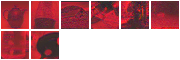

In [19]:
itorch.image(torch.cat(y_images,uv_op,2))

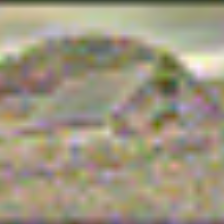

In [20]:
itorch.image(image.scale(image.yuv2rgb(torch.cat(y_images[3],uv_op[3],1)),224,224))

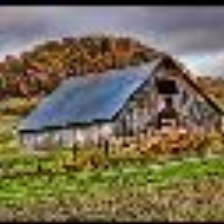

In [21]:
itorch.image(image.scale(im_batch[3],224,224))

In [22]:
local layer_nums = {3,9}
local num_images = 8;
val_im_batch,val_hc_batch = create_hypercolumn_dataset_random_bw(num_images, layer_nums)
-- val_im_batch,val_hc_batch = create_hypercolumn_dataset_random(num_images, layer_nums);
hc_size = val_hc_batch:size()
num_hypercolumns = hc_size[2]
uv_images,y_images = create_yuv_images(val_im_batch,28,28)
net:forward(val_hc_batch);
val_uv = net.output -0.5;

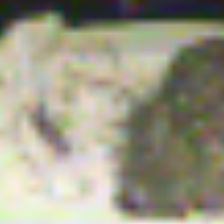

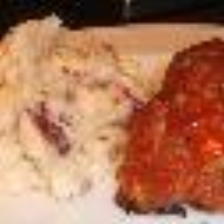

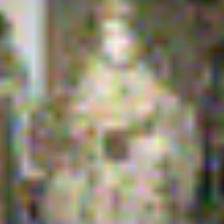

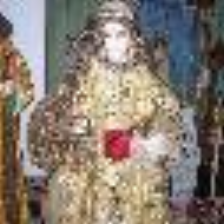

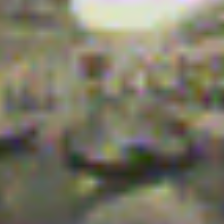

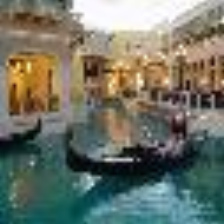

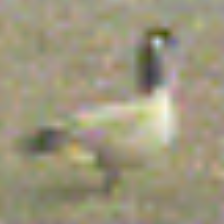

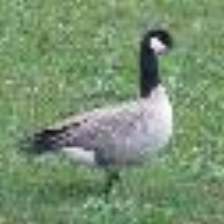

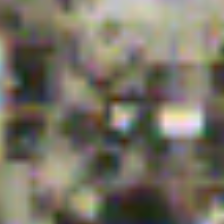

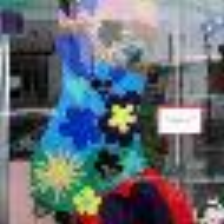

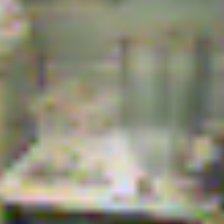

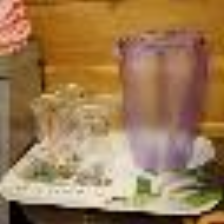

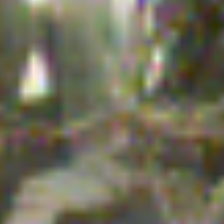

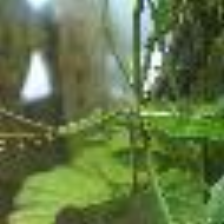

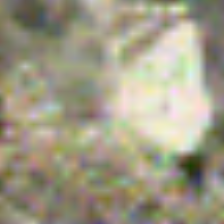

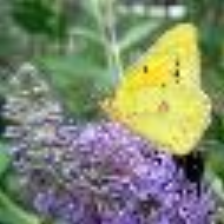

In [23]:
local num_images = 8;
for iter=1,num_images do
    itorch.image(image.scale(image.yuv2rgb(torch.cat(y_images[iter],val_uv[iter],1)),224,224))
    itorch.image(image.scale(im_batch[iter],224,224))
end

In [25]:
local layer_nums = {3,9}
local num_images = 8;
-- val_im_batch,val_hc_batch = create_hypercolumn_dataset_random_bw(num_images, layer_nums)
val_im_batch,val_hc_batch = create_hypercolumn_dataset_random(num_images, layer_nums);
hc_size = val_hc_batch:size()
num_hypercolumns = hc_size[2]
uv_images,y_images = create_yuv_images(val_im_batch,28,28)
net:forward(val_hc_batch);
val_uv = net.output -0.5;

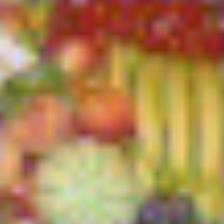

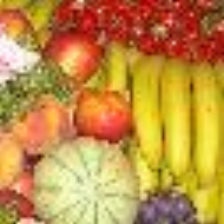

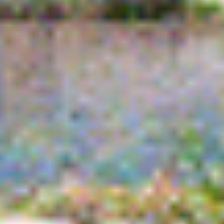

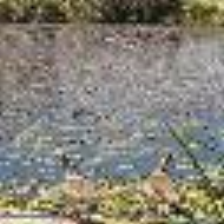

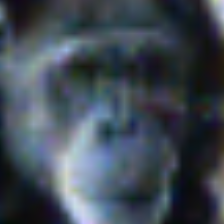

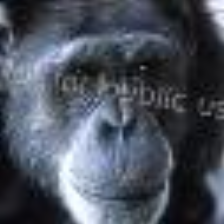

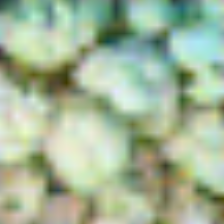

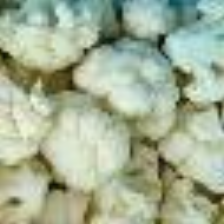

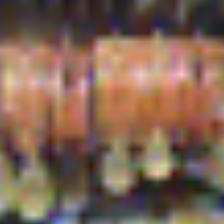

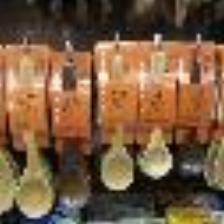

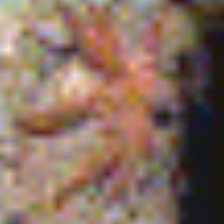

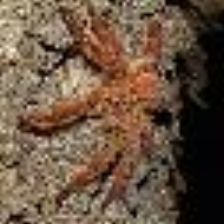

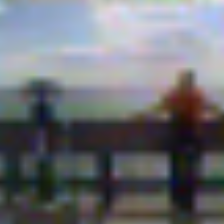

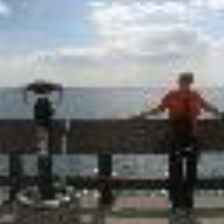

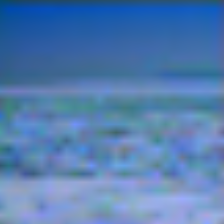

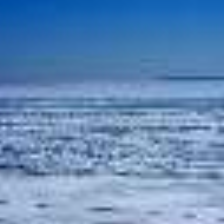

In [26]:
local num_images = 8;
for iter=1,num_images do
    itorch.image(image.scale(image.yuv2rgb(torch.cat(y_images[iter],val_uv[iter],1)),224,224))
    itorch.image(image.scale(im_batch[iter],224,224))
end